# PUI Homework 8, Assignment 1

In [46]:
__author__ = 'Ruben Hambardzumyan, rh2684'

In [45]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import statsmodels.formula.api as smf

%pylab inline

np.random.seed(1452)

Populating the interactive namespace from numpy and matplotlib


In [26]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/waf7-5gvc.csv')

In [29]:
df.columns =['NYC Total Population', 'Water Consumption Per Day, Millions of Gallons',
                 'Per Capita Consumption Per Day', 'Year']

In [30]:
df.head()

,NYC Total Population,"Water Consumption Per Day, Millions of Gallons",Per Capita Consumption Per Day,Year
0,7102100,1512,213,1979
1,7071639,1506,213,1980
2,7089241,1309,185,1981
3,7109105,1382,194,1982
4,7181224,1424,198,1983


In [78]:
df['NYC Total Population'].describe()

count    3.800000e+01
mean     7.764553e+06
std      4.610189e+05
min      7.071639e+06
25%      7.342901e+06
50%      7.815851e+06
75%      8.120906e+06
max      8.550405e+06
Name: NYC Total Population, dtype: float64

In [83]:
popChange = (df['NYC Total Population'].max() - df['NYC Total Population'].min()) / df['NYC Total Population'].max() * 100
print(popChange)

17.2946895498


In [31]:
df.shape

(38, 4)

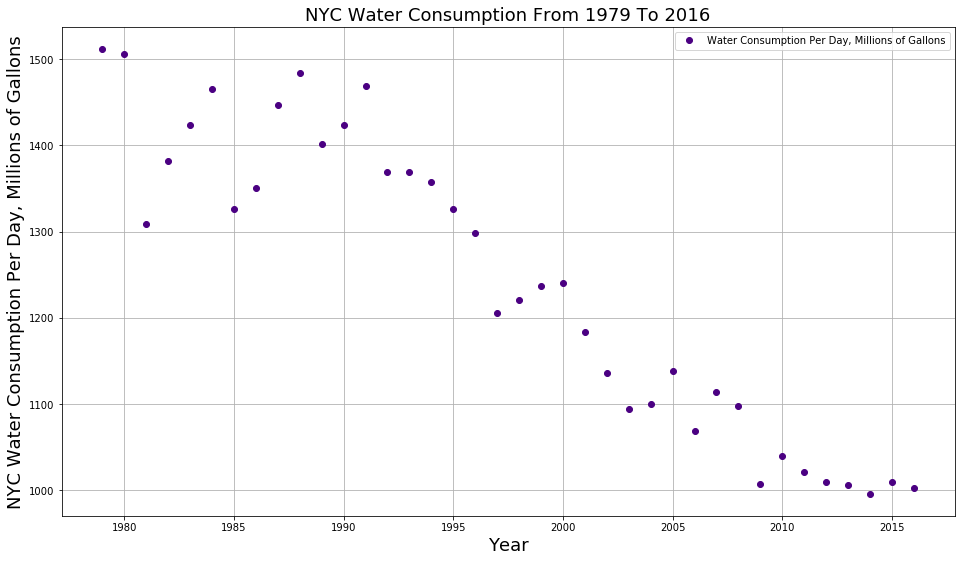

In [77]:
fig = figsize(16, 9)

pl.plot(df['Year'], df['Water Consumption Per Day, Millions of Gallons'], 'o', c='indigo', figure=fig)
pl.xlabel('Year', fontsize=18)
pl.ylabel('NYC Water Consumption Per Day, Millions of Gallons', fontsize=18)
pl.title('NYC Water Consumption From 1979 To 2016', fontsize=18)
pl.grid(True)

pl.legend()
pl.show()

<p style="background-color:#f9f9f9;
          text-align:justify; 
          padding:10px;
          font-family:monospace;">
**Figure 1**: The figure shows the NYC daily water consumption in millions of gallons according to the time period from 1979 to 2016.</p>

In [60]:
lmdf = pd.DataFrame(df, columns=['Water Consumption Per Day, Millions of Gallons', 'Year'])

In [62]:
lmdf.columns = ['Y', 'X']

In [63]:
lm = smf.ols('Y ~ X', data=lmdf).fit()

In [64]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     279.4
Date:                Wed, 15 Nov 2017   Prob (F-statistic):           1.51e-18
Time:                        21:45:52   Log-Likelihood:                -207.86
No. Observations:                  38   AIC:                             419.7
Df Residuals:                      36   BIC:                             423.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.04e+04   1744.535     17.425      0.000    2.69e+04    3.39e+04
X            -14.5974      0.873    -16.714      0.000     -16.369     -12.826
==============================================================================
Omnibus:                        3.452   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.249
Skew:                          -0.384   Prob(JB):                        0.325
Kurtosis:                       3.911   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

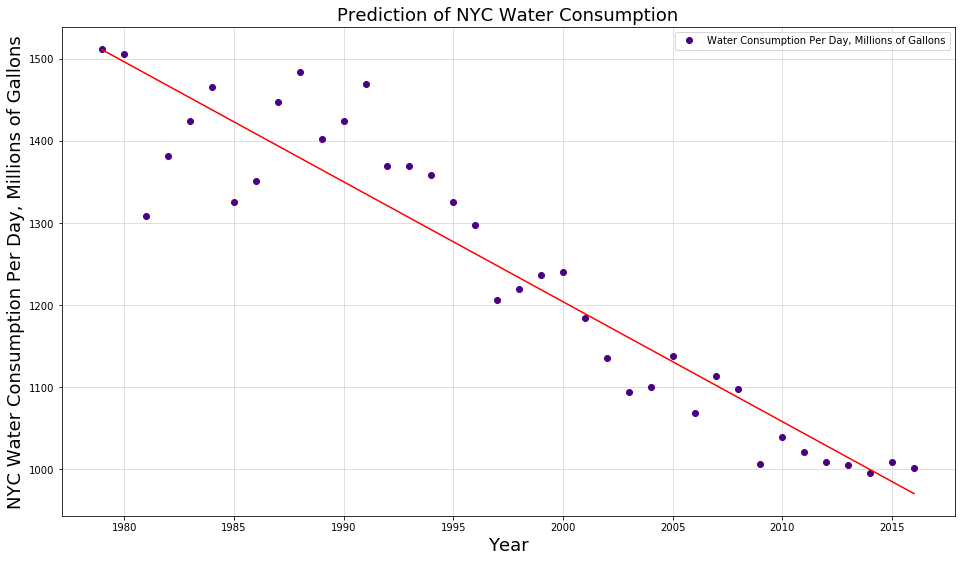

In [112]:
fig = figsize(16, 9)

pl.plot(df['Year'], df['Water Consumption Per Day, Millions of Gallons'], 'o', c='indigo', figure=fig)
pl.plot(lmdf.X, lm.predict(),'r-')
pl.xlabel('Year', fontsize=18)
pl.ylabel('NYC Water Consumption Per Day, Millions of Gallons', fontsize=18)
pl.title('Prediction of NYC Water Consumption', fontsize=18)
pl.grid(True, color='#D8D8D8')

pl.legend()
pl.show()

<p style="background-color:#f9f9f9;
          text-align:justify; 
          padding:10px;
          font-family:monospace;">
**Figure 2**: The figure shows the prediction of NYC daily water consumption in millions of gallons based on the historical daily water consumption data for the period of 1979 to 2016. It is interesting that despite the total population increase of 17,3% for the mentioned period the daily water consumption was decreased by 34%! The regression line (R-squared = 0.88) fitted to the data predicts the trend of further consumption reduction.</p>